In [11]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

hf_token=os.getenv("HF_TOKEN")
gemini_key=os.getenv("GEMINI_API_KEY")

In [10]:
df = pd.read_csv("./9000plus.csv")
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


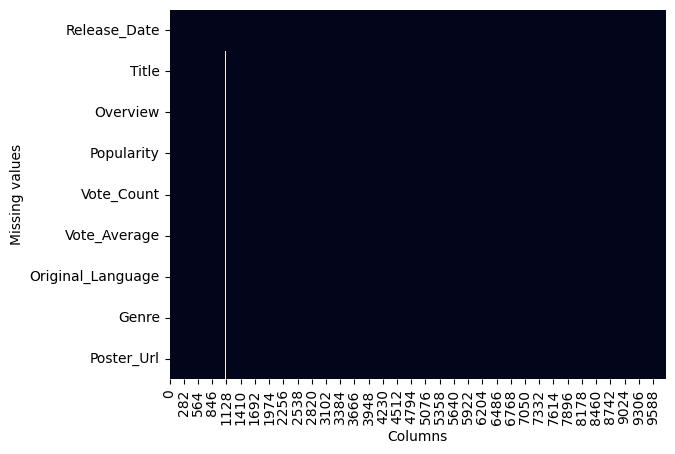

In [13]:
ax = plt.axes()
sns.heatmap(df.isnull().transpose(),cbar=False,ax=ax)
plt.xlabel("Columns")
plt.ylabel("Missing values")
plt.show()

In [19]:
#lets look at the percentage of missing values
missing_percent = (df.isna().sum()/df.shape[0])*100
missing_percent.sort_values(ascending=True)

Release_Date         0.000000
Title                0.091491
Overview             0.091491
Popularity           0.101657
Vote_Count           0.101657
Vote_Average         0.101657
Original_Language    0.101657
Genre                0.111823
Poster_Url           0.111823
dtype: float64

In [27]:
#rows missing critical information like title and overview must be removed
critical_cols=['Title','Overview','Popularity','Vote_Count','Vote_Average','Poster_Url']
df_cleaned=df.dropna(subset=critical_cols)

df_cleaned["Original_Language"]=df_cleaned["Original_Language"].fillna("Unknown")
df_cleaned["Genre"]=df_cleaned["Genre"].fillna("Unknown")


print(df_cleaned.shape)
print(df.shape)

missing_percent = (df_cleaned.isna().sum()/df.shape[0])*100
missing_percent.sort_values(ascending=True)


(9826, 9)
(9837, 9)


/var/folders/jx/wr78n4d51254ycmhp60439fh0000gn/T/ipykernel_35964/784210969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Original_Language"]=df_cleaned["Original_Language"].fillna("Unknown")
/var/folders/jx/wr78n4d51254ycmhp60439fh0000gn/T/ipykernel_35964/784210969.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Genre"]=df_cleaned["Genre"].fillna("Unknown")


Release_Date         0.0
Title                0.0
Overview             0.0
Popularity           0.0
Vote_Count           0.0
Vote_Average         0.0
Original_Language    0.0
Genre                0.0
Poster_Url           0.0
dtype: float64

In [31]:
#Semantic search is mostly based on the similarity of the overview and genre, so first lets try to normalise the genre

#get the genres of each movie in list
df_cleaned['Genre_List'] = df_cleaned['Genre'].apply(lambda x : [g.strip() for g in x.split(',') ])

#now find the unique genres
all_genres = set(g for sublist in df_cleaned['Genre_List'] for g in sublist)
unique_genres = sorted(all_genres)

print(unique_genres)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


/var/folders/jx/wr78n4d51254ycmhp60439fh0000gn/T/ipykernel_35964/1126701215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Genre_List'] = df_cleaned['Genre'].apply(lambda x : [g.strip() for g in x.split(',') ])


In [37]:
#and now one-hot encode genres, create a new column for each genre and put 1 is it belongs to that genre or else 0

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

genre_encoded = mlb.fit_transform(df_cleaned['Genre_List'])

#Create a new dataframe with one hot encoding with the genre
genre_df = pd.DataFrame(genre_encoded,columns=mlb.classes_,index=df_cleaned.index)

#attach with the cleaned dataset
df_final=pd.concat([df_cleaned,genre_df],axis=1)

df_final = df_final.drop(['Genre_List'],axis=1)

df_final

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Action,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,1,...,0,0,0,0,0,1,0,0,0,0
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,0,...,0,0,0,1,0,0,0,1,0,0
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,0,...,0,0,0,0,0,0,0,1,0,0
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,0,...,0,0,0,0,0,0,0,0,0,0
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...,0,...,0,1,0,0,0,0,0,0,0,0
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...,0,...,0,1,0,1,0,0,0,1,0,0
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,0,...,1,0,1,0,0,0,0,0,0,0
